In [52]:
import pandas as pd
import seaborn as sns

In [46]:
diamonds=pd.read_csv("input/train.csv")
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [47]:
diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Como no hay valores nulos, no tenemos que realizar ningún tipo de limpieza en ese aspecto.

In [48]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

Para ver qué columnas influyen más en el precio vamos a hacer una matriz de correlación y así seleccionamos aquellas features que sea pertinentes para predecir el precio.

In [51]:
diamonds.corr().price.sort_values(ascending=False)

price    1.000000
carat    0.922567
x        0.884089
y        0.858536
z        0.855923
table    0.129777
id       0.006826
depth   -0.005105
Name: price, dtype: float64

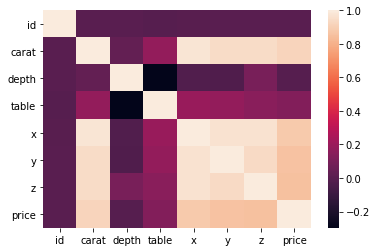

In [53]:
sns.heatmap(diamonds.corr())

In [93]:
diamonds.drop()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.797150,61.746612,57.453561,5.729391,5.733217,3.537644,3928.715264
std,11678.496907,0.472872,1.431006,2.235668,1.121283,1.151076,0.709557,3985.070609
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000
max,40454.000000,4.500000,79.000000,95.000000,10.230000,58.900000,31.800000,18818.000000


Como vemos tanto en la tabla como en el gráfico, las variables que no influyen prácticamente en el precio son id, depth y table, por lo tanto, vamos a hacer un drop para eliminar info innecesaria.

**Como hay tres columnas que tienen dtype object vamos a ver cuantos valores distintos existen para luego poder convertirlos a columnas numéricas.**

In [54]:
diamonds.clarity.unique()

array(['VS2', 'SI1', 'VS1', 'SI2', 'VVS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [55]:
diamonds.color.unique()

array(['F', 'E', 'D', 'H', 'G', 'J', 'I'], dtype=object)

In [56]:
diamonds.cut.unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

**A cada una de las columnas vamos a asignarle un diccionario para convertir los valores cualtitativos en valores cuantitativos.**

In [57]:
from sklearn import preprocessing

In [58]:
le = preprocessing.LabelEncoder()
diamonds["color_"]=le.fit_transform(diamonds["color"])

In [59]:
diamonds["clarity_"]=le.fit_transform(diamonds["clarity"])
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,color_,clarity_
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,2,5
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,1,2
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,0,2
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4,4
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,0,2


Después de haber leído varios artículos para hacer machine learning es mejor utilizar get_dummies así que vamos a aplicar esto a las columnas categóricas y luego exportamos el dataset.

In [75]:
diamonds=pd.read_csv("input/train.csv")
diam=pd.get_dummies(diamonds)
diam.head()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.30,62.8,56.0,4.29,4.31,2.70,605,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.34,62.6,55.0,4.46,4.49,2.80,565,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.40,61.8,59.2,4.72,4.74,2.92,793,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
train=diam.drop(columns=["id","depth","table"])

In [89]:
train.to_csv("input/train_diam.csv",index=False)

Ahora ya que hemos hecho un pd.get_dummies para el set de entrenamiento debemos hacer lo mismo con el set de test.

In [78]:
diam_test=pd.read_csv("input/predict.csv")
diam_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [79]:
diam_test=pd.get_dummies(diam_test)
diam_test.head()

,id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,2.36,60.8,54.0,8.68,8.57,5.24,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,1,2.04,62.0,56.0,8.18,8.23,5.09,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0.51,61.7,54.0,5.18,5.19,3.20,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,3,0.30,61.3,56.0,4.32,4.33,2.65,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,4,0.96,68.8,56.0,6.11,5.98,4.16,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
test=diam_test.drop(columns=["depth","table","id"])

In [88]:
test.to_csv("input/test_diam.csv",index=False)